In [1]:
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05],
                     [0.05, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

In [2]:
from cobaya.yaml import yaml_load_file

info_from_yaml = yaml_load_file("gaussian.yaml")

In [5]:
from cobaya.run import run

updated_info, sampler = run(info_from_yaml)

[output] Output to be read-from/written-into folder 'chains', with prefix 'gaussian'
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 16600.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:2.698935, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2021-08-31 15:21:37 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.216
[mcmc]  - Convergence of means: R-1 = 0.380744 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.


[mcmc]  - Convergence of means: R-1 = 0.009309 after 2240 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2880 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.011590 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.303
[mcmc]  - Convergence of means: R-1 = 0.011742 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.010592 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.016621 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Lea

[root] *WARNING* outlier fraction 0.0012195121951219512 
Mean:
[0.21421219 0.005902  ]
Covariance matrix:
[[0.09096477 0.03774025]
 [0.03774025 0.15947592]]


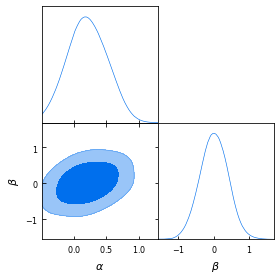

In [6]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
# %matplotlib inline  # uncomment if running from the Jupyter notebook
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

## Complicated problem

In [7]:
import numpy as np
from scipy import stats


def gauss_ring_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood on cartesian coordinater,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(np.sqrt(x**2 + y**2), loc=mean_radius, scale=std)

In [8]:
info = {"likelihood": {"ring": gauss_ring_logp}}

In [9]:
info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

In [10]:
def get_r(x, y):
    return np.sqrt(x ** 2 + y ** 2)


def get_theta(x, y):
    return np.arctan(y / x)

info["params"]["r"] = {"derived": get_r}
info["params"]["theta"] = {"derived": get_theta,
                           "latex": r"\theta", "min": 0, "max": np.pi/2}

In [12]:
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.001, "max_tries": 1000}}

from cobaya.run import run
updated_info, sampler = run(info)

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 7350.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2021-08-31 15:25:29 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.634
[mcmc]  - Convergence of means: R-1 = 1.695423 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.554
[mcmc]  - Convergence of means: R-1 = 1.134814 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.337

[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.053796 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.040974 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.029738 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.026488 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3280 samples accepted.
[mcmc]  - Acceptance rate: 0.093
[mcmc]  - Convergence of means: R-1 = 0.024488

[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.002737 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.090
[mcmc]  - Convergence of means: R-1 = 0.001871 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.002901 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.006299 after 4992 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6320 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.004796

[root] *WARNING* auto bandwidth for theta very small or failed (h=0.0005318394812080749,N_eff=2468.9435913175917). Using fallback (h=0.08165912460863337)


(2, 1)

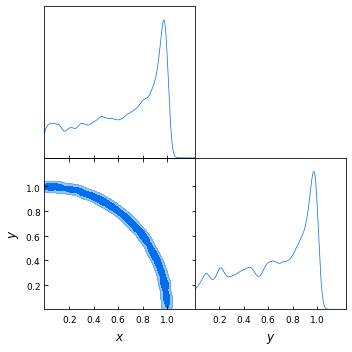

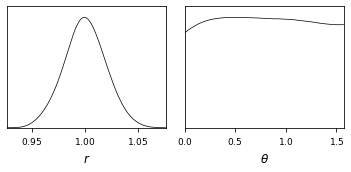

In [13]:
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.plots_1d(gdsamples, ["r", "theta"], nx=2)

In [14]:
info

{'likelihood': {'ring': <function __main__.gauss_ring_logp(x, y, mean_radius=1, std=0.02)>},
 'params': {'x': {'prior': {'min': 0, 'max': 2}, 'ref': 0.5, 'proposal': 0.01},
  'y': {'prior': {'min': 0, 'max': 2}, 'ref': 0.5, 'proposal': 0.01},
  'r': {'derived': <function __main__.get_r(x, y)>},
  'theta': {'derived': <function __main__.get_theta(x, y)>,
   'latex': '\\theta',
   'min': 0,
   'max': 1.5707963267948966}},
 'sampler': {'mcmc': {'Rminus1_stop': 0.001, 'max_tries': 1000}}}